In [1]:
import os
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from process_log import Tags, Log, Epochs, generate_fitness_wc_dataframe
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("population_sizes_correct.gz")
df

,fitness,wall clock time,epoch,rank,rep,population,elite_size,epochs,data
0,42370,0.127,0,0,0,128,64,128000,ch130csv
1,42080,0.192,1,0,0,128,64,128000,ch130csv
2,42015,0.246,2,0,0,128,64,128000,ch130csv
3,42015,0.300,3,0,0,128,64,128000,ch130csv
4,41087,0.356,4,0,0,128,64,128000,ch130csv
...,...,...,...,...,...,...,...,...,...
102299995,180229,21500.415,127995,0,4,128,64,128000,att532csv
102299996,180229,21500.593,127996,0,4,128,64,128000,att532csv
102299997,180229,21500.768,127997,0,4,128,64,128000,att532csv
102299998,180229,21500.943,127998,0,4,128,64,128000,att532csv


In [18]:
tv = df.drop(columns=["rank"])
tv = tv[tv.data == "att532csv"]
tv

,fitness,wall clock time,epoch,rep,population,elite_size,epochs,data
640000,1512611,1.318,0,0,256,128,64000,att532csv
640001,1512611,1.853,1,0,256,128,64000,att532csv
640002,1512611,2.379,2,0,256,128,64000,att532csv
640003,1511160,2.919,3,0,256,128,64000,att532csv
640004,1477027,3.441,4,0,256,128,64000,att532csv
...,...,...,...,...,...,...,...,...
102299995,180229,21500.415,127995,4,128,64,128000,att532csv
102299996,180229,21500.593,127996,4,128,64,128000,att532csv
102299997,180229,21500.768,127997,4,128,64,128000,att532csv
102299998,180229,21500.943,127998,4,128,64,128000,att532csv


In [19]:
tv.fitness.min()

160588

In [20]:
max_wct = tv.groupby(["rep", "population"]).agg({"wall clock time": "max"})["wall clock time"].min()
min_wct = tv.groupby(["rep", "population"]).agg({"wall clock time": "min"})["wall clock time"].max()
thresholds = np.round(np.linspace(min_wct, max_wct, num=100), 0).astype(int)
thresholds

array([   41,   248,   454,   661,   868,  1075,  1281,  1488,  1695,
        1902,  2109,  2315,  2522,  2729,  2936,  3142,  3349,  3556,
        3763,  3970,  4176,  4383,  4590,  4797,  5003,  5210,  5417,
        5624,  5830,  6037,  6244,  6451,  6658,  6864,  7071,  7278,
        7485,  7691,  7898,  8105,  8312,  8519,  8725,  8932,  9139,
        9346,  9552,  9759,  9966, 10173, 10379, 10586, 10793, 11000,
       11207, 11413, 11620, 11827, 12034, 12240, 12447, 12654, 12861,
       13068, 13274, 13481, 13688, 13895, 14101, 14308, 14515, 14722,
       14928, 15135, 15342, 15549, 15756, 15962, 16169, 16376, 16583,
       16789, 16996, 17203, 17410, 17616, 17823, 18030, 18237, 18444,
       18650, 18857, 19064, 19271, 19477, 19684, 19891, 20098, 20305,
       20511])

In [21]:
line_df = None
for threshold in tqdm(thresholds):
    tmp_df = tv[tv["wall clock time"] >= threshold].groupby(["population", "rep"]).agg({"fitness": "max"})
    tmp_df["wall clock time"] = threshold
    tmp_df = tmp_df.reset_index()

    if line_df is None:
        line_df = tmp_df
    else:
        line_df = line_df.append(tmp_df, ignore_index=True)

In [22]:
line_df

,population,rep,fitness,wall clock time
0,8,0,907586,41
1,8,1,1012236,41
2,8,2,864117,41
3,8,3,872416,41
4,8,4,932274,41
...,...,...,...,...
4995,4096,0,620922,20511
4996,4096,1,392555,20511
4997,4096,2,333150,20511
4998,4096,3,626960,20511


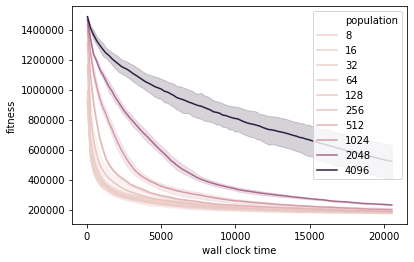

In [29]:
fig, ax = plt.subplots()
sns.lineplot(ax=ax, y="fitness", x="wall clock time", hue="population", legend="full", data=line_df)

In [30]:
fig.savefig("att532_full.png", dpi=300)